In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Q1: Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('Sparkling.csv',parse_dates =True, index_col=0)
df.head()


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


**Plotting the Time Series to understand the behaviour of the data.**

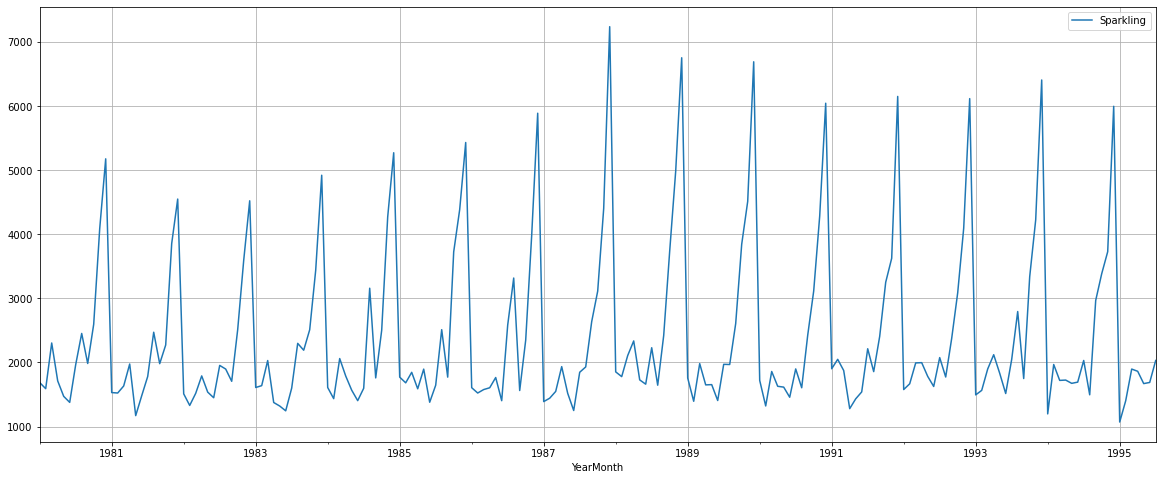

In [6]:
df.plot(figsize=(20,8), grid =True);

In [7]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


### Q2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [8]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [9]:
#finding number of missing values in the data set

df.isnull().sum()

Sparkling    0
dtype: int64

**Plotting a boxplot to understand the spread of accidents across different years and within different months across years.**

In [10]:
df['1980']

<ipython-input-10-431a9f6d2ea2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1980']


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
1980-06-01,1377
1980-07-01,1966
1980-08-01,2453
1980-09-01,1984


**Yearly Boxplot**

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

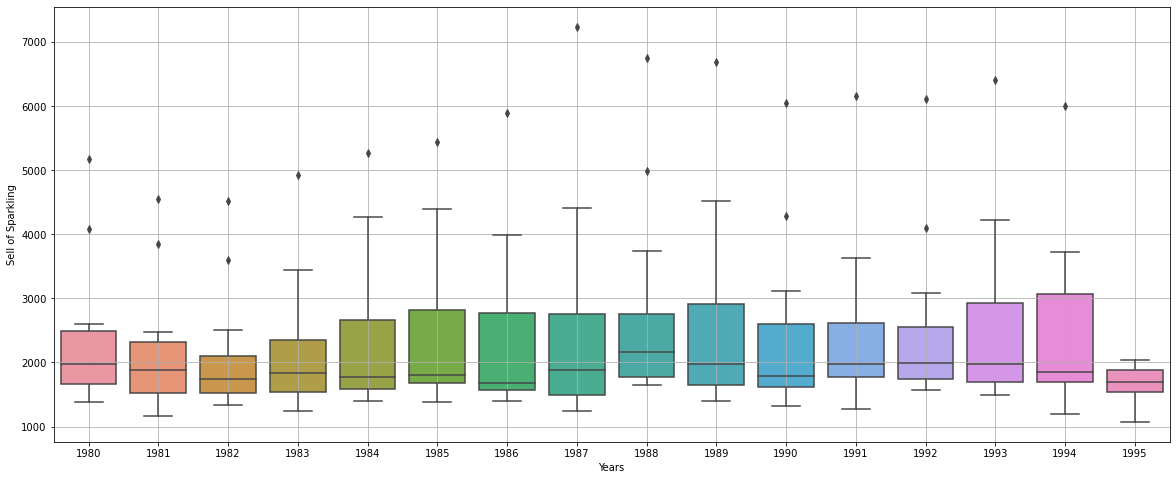

In [12]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();
plt.xlabel('Years');
plt.ylabel('Sell of Sparkling');

**Monthly Boxplot**

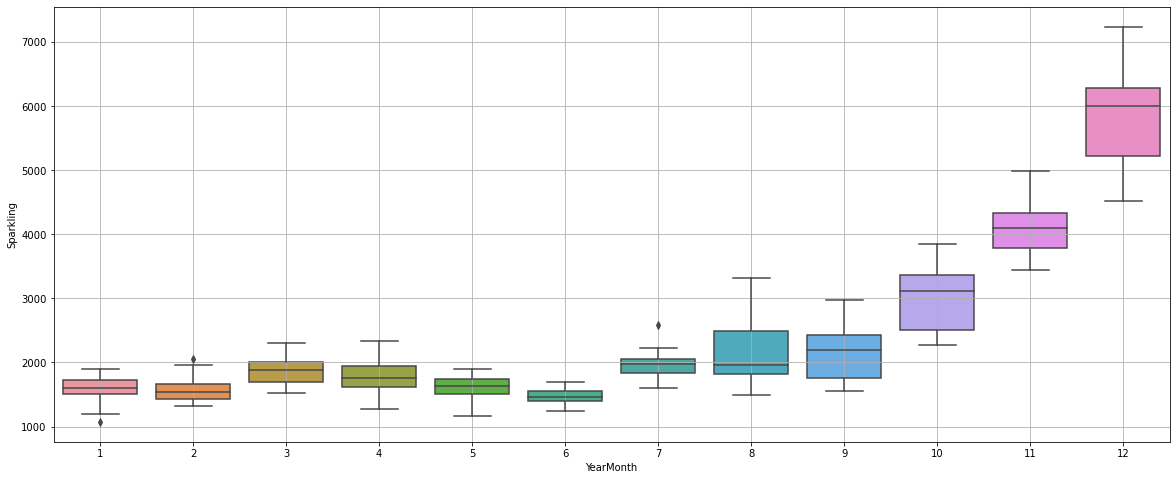

In [13]:
sns.boxplot(x = df.index.month,y = df['Sparkling'])
plt.grid();

In [14]:
from statsmodels.graphics.tsaplots import month_plot

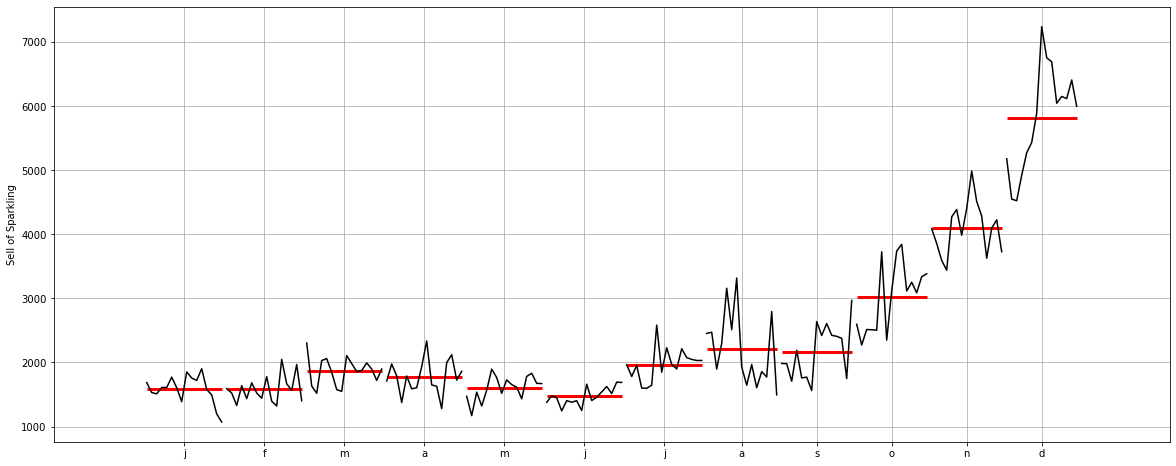

In [15]:
month_plot(df['Sparkling'],ylabel='Sell of Sparkling')
plt.grid();

In [16]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

**Monthly Sale Across Different Years**

In [17]:
monthly_sale_across_yeras = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, 
                                        index = df.index.year)
monthly_sale_across_yeras

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


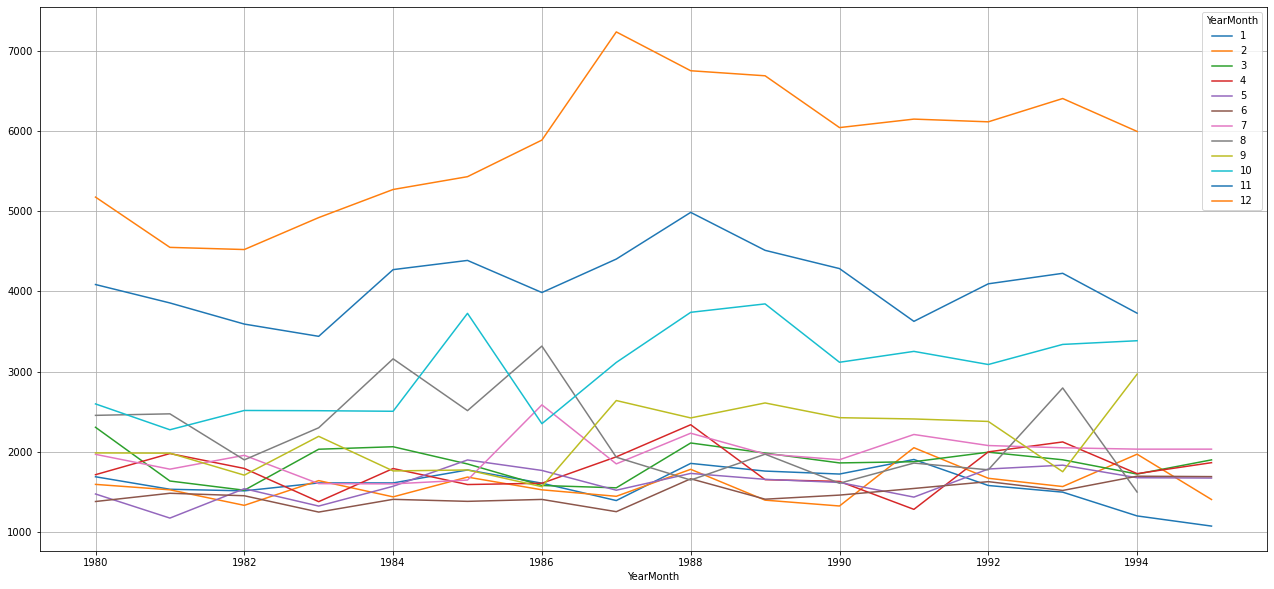

In [18]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sale_across_yeras.plot(ax=ax)
plt.grid();

**Yearly Sale**

In [19]:
df_yearly_sale = df.resample('A').sum()
df_yearly_sale.head()

,Sparkling
YearMonth,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


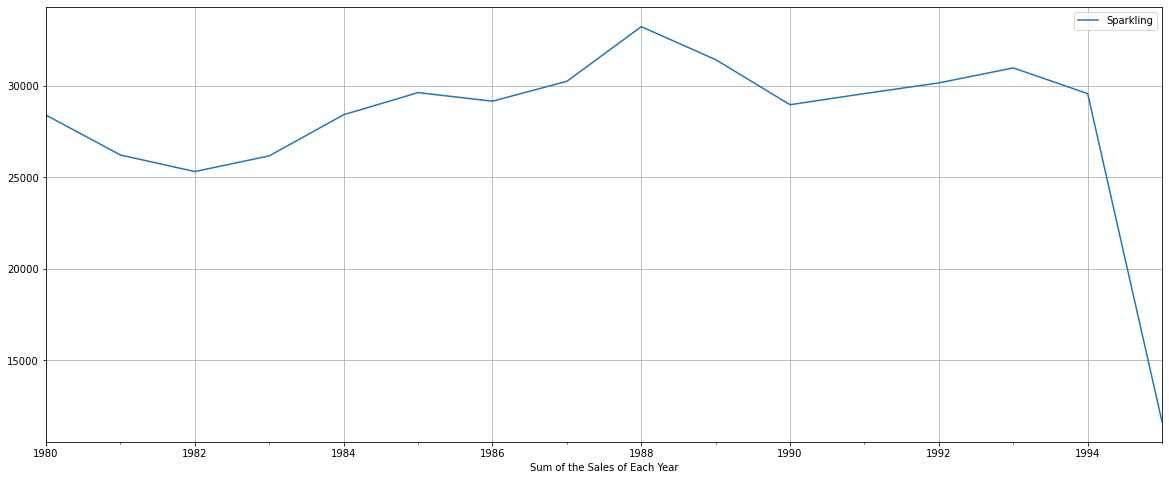

In [20]:
df_yearly_sale.plot();
plt.grid()
plt.xlabel('Sum of the Sales of Each Year');

**Average annual sale**

In [21]:
df_yearly_avg = df.resample('Y').mean()
df_yearly_avg.head()

,Sparkling
YearMonth,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


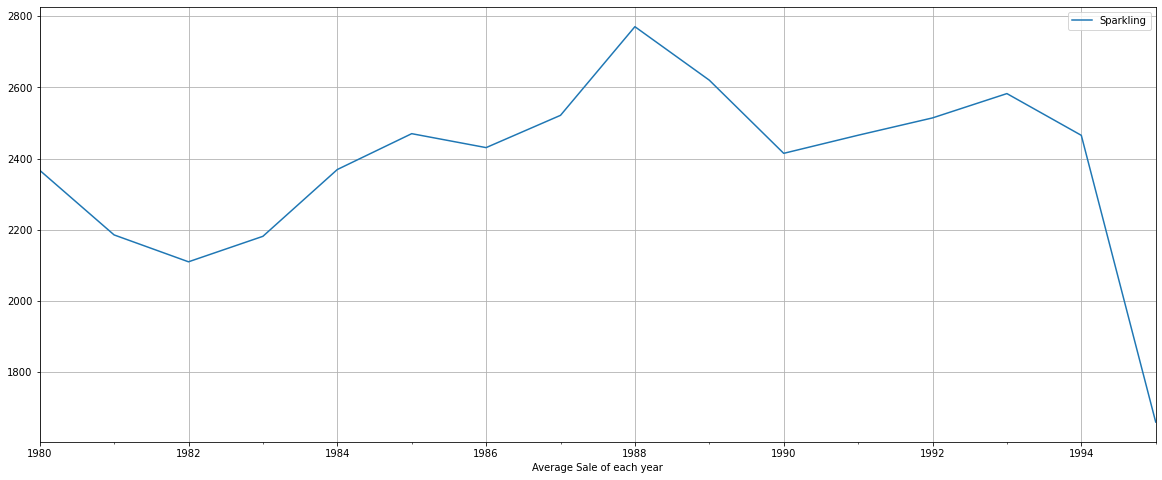

In [22]:
df_yearly_avg.plot();
plt.grid()
plt.xlabel('Average Sale of each year');

**Average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.**

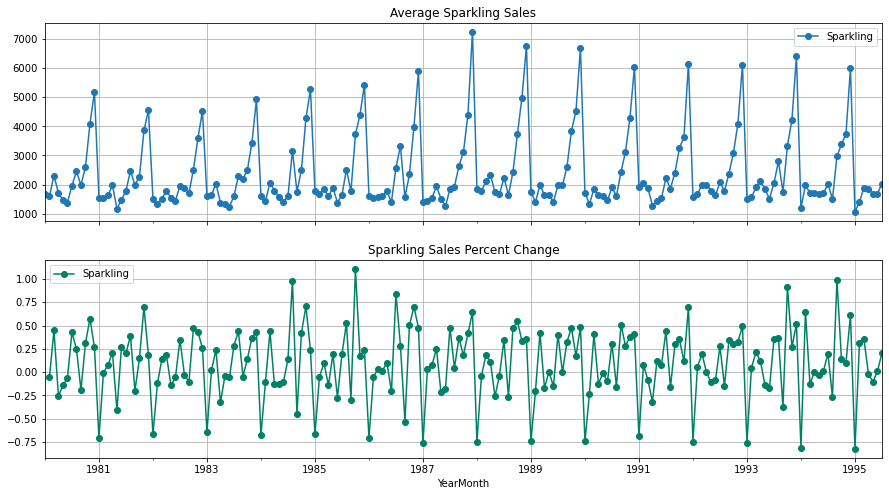

In [23]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

**Decomposition of data for Time series analysis**

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

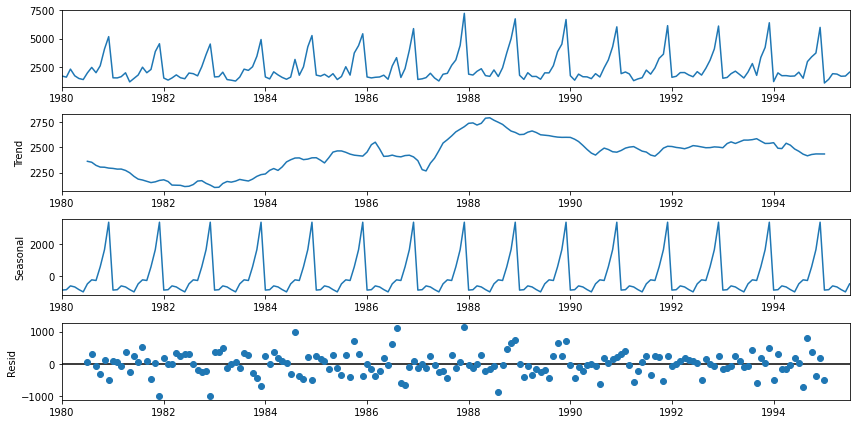

In [25]:
# additive decomposition
rcParams['figure.figsize'] = 12,6
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

As observed in 'additive' decomposition, seasonality is present on yearly basis. There is a slight trend in error term as well.

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


**Multiplicative decomposition**

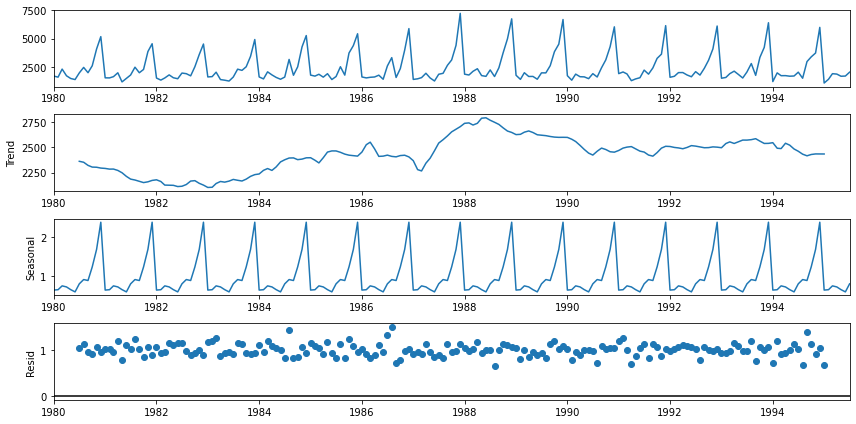

In [27]:
rcParams['figure.figsize'] = 12, 6

decomposition1 = seasonal_decompose(df,model='multiplicative')
decomposition1.plot();

In [28]:
trend_m = decomposition1.trend
seasonality_m = decomposition1.seasonal
residual_m = decomposition1.resid

print('Trend','\n',trend_m.head(12),'\n')
print('Seasonality','\n',seasonality_m.head(12),'\n')
print('Residual','\n',residual_m.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Q3: Split the data into training and test. The test data should start in 1991.

In [29]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]
print("Shape of Training Data is", train.shape)
print("Shape of Test Data is", test.shape)

Shape of Training Data is (132, 1)
Shape of Test Data is (55, 1)


In [30]:
display(train.tail())

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [31]:
display(test.head())

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


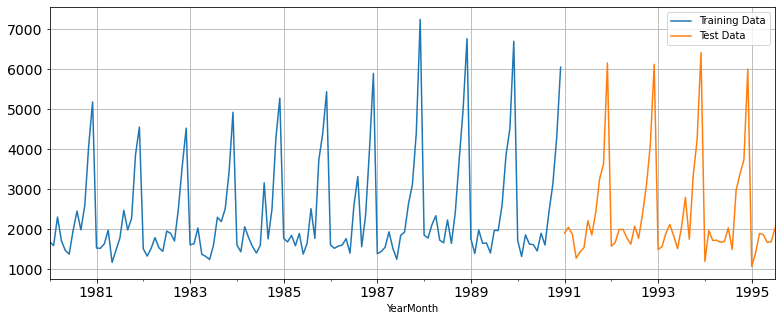

In [32]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

.

### Q4: Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 
- ### Other models such as regression,naïve forecast models and simple average models. 
- ### Should also be built on the training data and check the performance on the test data using RMSE.

**4.1. Building Regression Model**

In [33]:
# Regression Model

train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [34]:
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

In [35]:
print(LR_train.head())
print(LR_train.tail())

            Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5
            Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132


In [36]:
print(LR_test.head())
print(LR_test.tail())

            Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137
            Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187


In [37]:
import sklearn
print(sklearn.__version__)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()

0.24.2


In [38]:
lr.fit(LR_train[['time']], LR_train['Sparkling'].values)

LinearRegression()

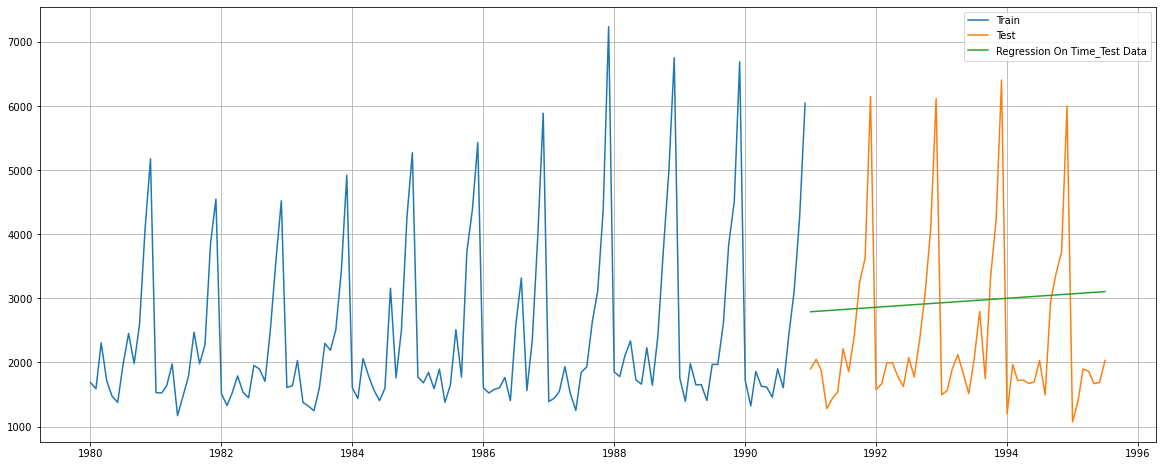

In [39]:
lr_predict = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = lr_predict

plt.figure(figsize=(20,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

**Conduct RMSE model evaluation**

In [40]:
from sklearn import metrics

In [41]:
#LR MODEL EVALUATION

rmse_lr = metrics.mean_squared_error(test['Sparkling'], lr_predict, squared=False)
print("RMSE of LR is %3.3f" %(rmse_lr))

RMSE of LR is 1389.135


In [42]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


**4.2. Building Naïve Forecast Model**

In [43]:
#naïve forecast model

NM_test = test.copy()
NM_train = train.copy()

NM_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NM_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

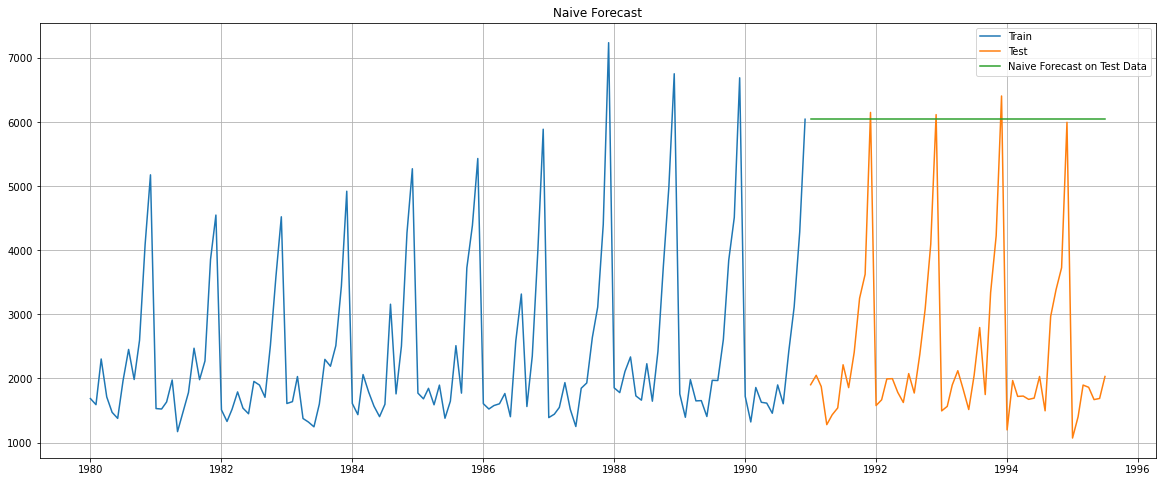

In [44]:
plt.figure(figsize=(20,8))
plt.plot(NM_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NM_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [45]:
#NF MODEL EVALUATION

rmse_nf = metrics.mean_squared_error(test['Sparkling'],NM_test['naive'],squared=False)
print("RMSE of NF is %3.3f" %(rmse_nf))

RMSE of NF is 3864.279


In [46]:
resultsDf_NF = pd.DataFrame({'Test RMSE': [rmse_nf]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_NF])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


**4.3. Building Simple Average Model**

In [47]:
#Simple Average

SA_test = test.copy()
SA_train = train.copy()

SA_test['mean_forecast'] = train['Sparkling'].mean()
SA_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


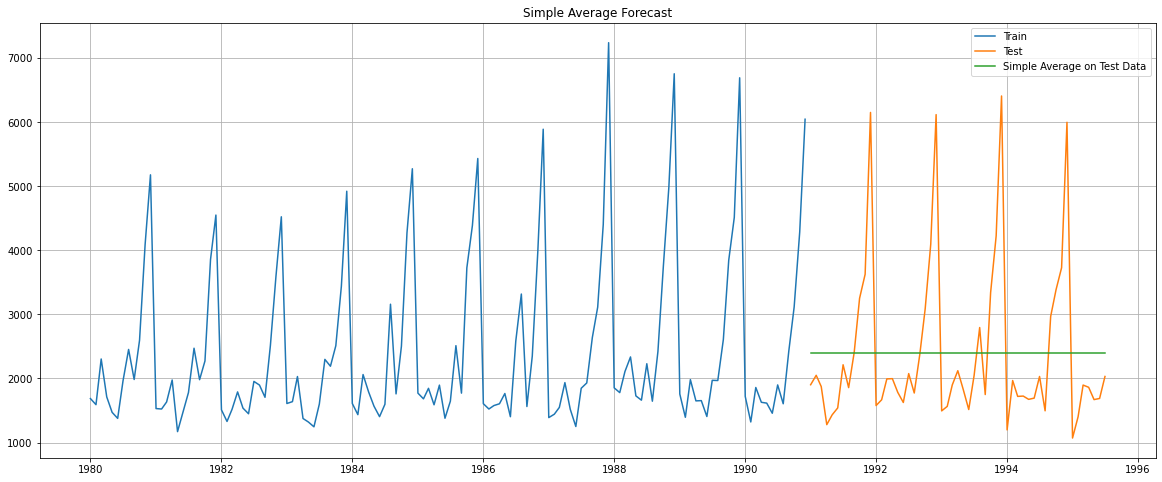

In [48]:
plt.figure(figsize=(20,8))
plt.plot(SA_train['Sparkling'], label='Train')
plt.plot(SA_test['Sparkling'], label='Test')
plt.plot(SA_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [49]:
#Simple Average Model Evaluation

rmse_sa = metrics.mean_squared_error(test['Sparkling'],SA_test['mean_forecast'],squared=False)
print("RMSE of SA isis %3.3f" %(rmse_sa))

RMSE of SA isis 1275.082


In [50]:
resultsDf_SA = pd.DataFrame({'Test RMSE': [rmse_sa]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_SA])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


.

**Building Exponential Smoothing Models**

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

**4.4. Building Single Exponential Smoothing Model (SES)**

In [52]:
SES_test = test.copy()
SES_train = train.copy()

In [53]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [54]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2724.932624
1991-02-01,2049,2724.932624
1991-03-01,1874,2724.932624
1991-04-01,1279,2724.932624
1991-05-01,1432,2724.932624


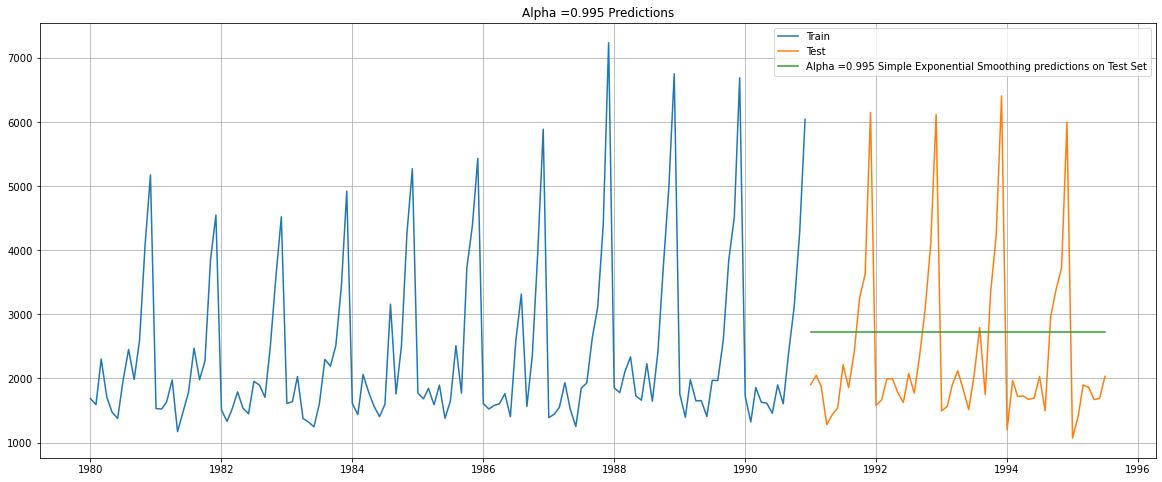

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

**SES Model Evaluation**

In [56]:
#SES MODEL EVALUATION

rmse_ses = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995, RMSE of SES is %3.3f" %(rmse_ses))

For Alpha =0.995, RMSE of SES is 1316.035


In [57]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse_ses]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_SES])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.995,SimpleExponentialSmoothing",1316.035487


**4.5. Building Double Exponential Smoothing - Holt's Model**

In [58]:
DES_test = test.copy()
DES_train = train.copy()
model_DES = Holt(DES_train['Sparkling'])

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [59]:
resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_DES

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [60]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend= j, optimized=False, use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_DES_test = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],)
        
        resultsDf_DES = resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [61]:
resultsDf_DES

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,2.535396e+06,2.535396e+06
1,0.3,0.4,2.831055e+06,2.831055e+06
2,0.3,0.5,3.138959e+06,3.138959e+06
3,0.3,0.6,3.417235e+06,3.417235e+06
4,0.3,0.7,3.609806e+06,3.609806e+06
...,...,...,...,...
59,1.0,0.6,3.074420e+06,3.074420e+06
60,1.0,0.7,3.331308e+06,3.331308e+06
61,1.0,0.8,3.617656e+06,3.617656e+06
62,1.0,0.9,3.941688e+06,3.941688e+06


In [62]:
resultsDf_DES.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
32,0.7,0.3,2.252068e+06,2.252068e+06
24,0.6,0.3,2.269391e+06,2.269391e+06
40,0.8,0.3,2.277533e+06,2.277533e+06
48,0.9,0.3,2.337537e+06,2.337537e+06
16,0.5,0.3,2.342662e+06,2.342662e+06


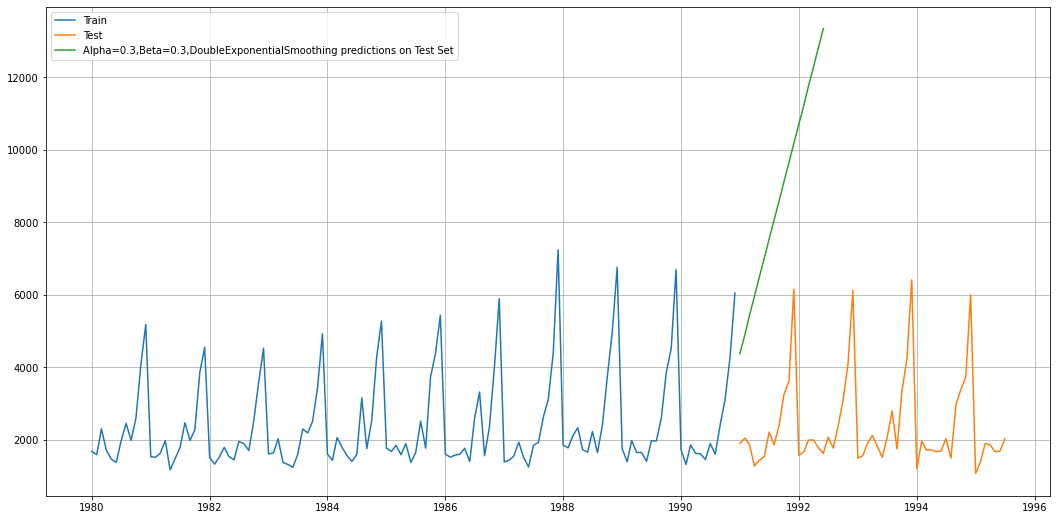

In [63]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [64]:
resultsDf_DES_1 = pd.DataFrame({'Test RMSE': [resultsDf_DES.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES_1])
resultsDf

,Test RMSE
RegressionOnTime,1.389135e+03
NaiveModel,3.864279e+03
SimpleAverageModel,1.275082e+03
"Alpha=0.995,SimpleExponentialSmoothing",1.316035e+03
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",2.252068e+06


**4.6. Building Triple Exponential Smoothing (Holt - Winter's Model)**

In [65]:
# Triple Exponential Smoothing (Holt - Winter's Model)
TES_test = test.copy()
TES_train = train.copy()

In [66]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')
#MS- Month Start

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [67]:
model_TES_autofit = model_TES.fit()

In [68]:
model_TES_autofit.params


{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1577.224489
1991-02-01,2049,1333.677558
1991-03-01,1874,1745.945679
1991-04-01,1279,1630.411925
1991-05-01,1432,1523.289070


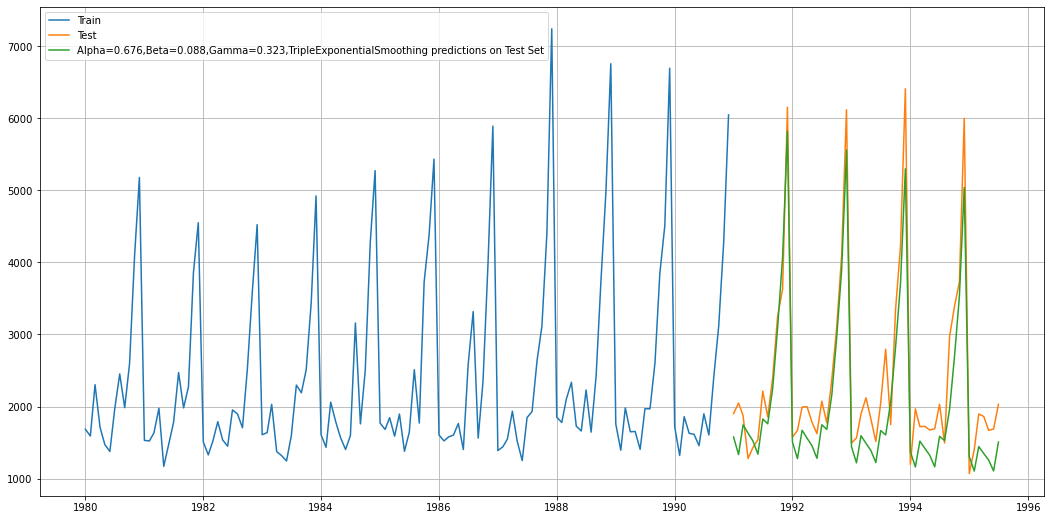

In [70]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [71]:
# Triple Exponential Smoothing (Holt - Winter's Model) Model Evaluation

rmse_TES = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768


In [72]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse_ses]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_SES])

In [73]:
resultsDf

,Test RMSE
RegressionOnTime,1.389135e+03
NaiveModel,3.864279e+03
SimpleAverageModel,1.275082e+03
"Alpha=0.995,SimpleExponentialSmoothing",1.316035e+03
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",2.252068e+06
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",1.316035e+03


.

### Q5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [74]:
from statsmodels.tsa.stattools import adfuller 

In [75]:
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

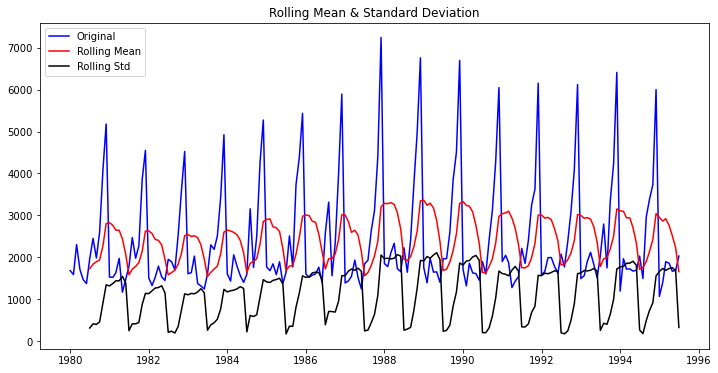

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [76]:
test_stationarity(df['Sparkling'])

p-value                          0.601061, Thus series is non stationarity. 

Difference of order 1, to check the time series again

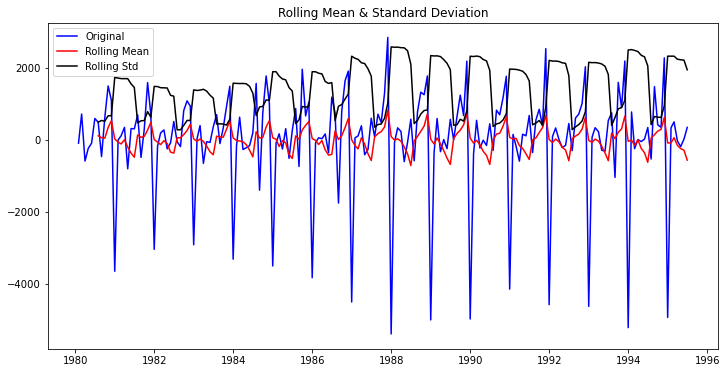

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [77]:
test_stationarity(df['Sparkling'].diff().dropna())

Now, series is stationary at alpha =0.05


### Q6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

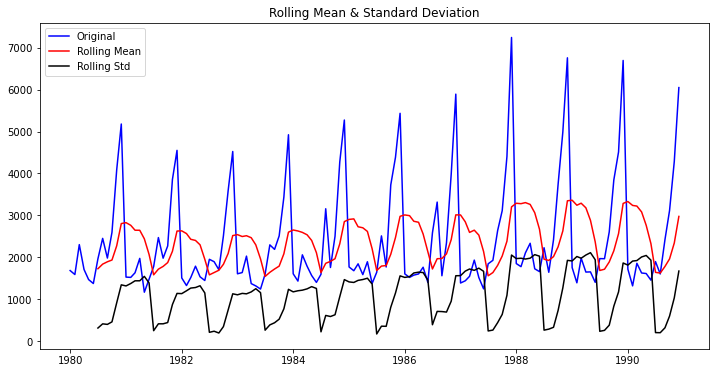

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [78]:
test_stationarity(train['Sparkling'])

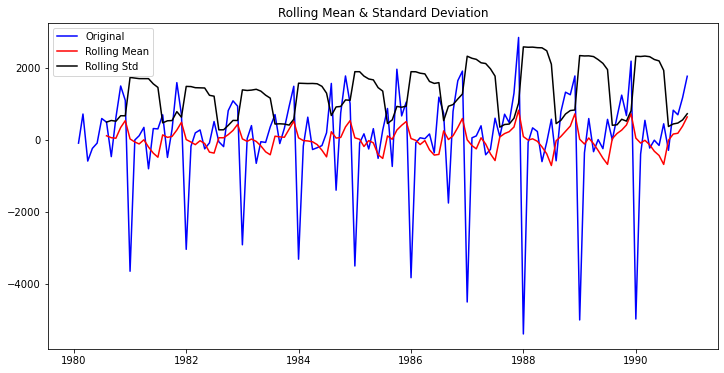

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [79]:
test_stationarity(train['Sparkling'].diff().dropna())

In [80]:
import itertools

In [81]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [82]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [83]:
from statsmodels.tsa.arima_model import ARIMA


In [84]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577


C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453511238


C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

ARIMA(1, 1, 2) - AIC:2233.59764711907
ARIMA(2, 1, 0) - AIC:2262.035600155025


C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2232.360489884417
ARIMA(2, 1, 2) - AIC:2210.618562220438


C:\Users\91951\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [85]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)  #ascending order sort

,param,AIC
8,"(2, 1, 2)",2210.618562
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906439
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [86]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.730
Date:                Sun, 20 Jun 2021   AIC                           2210.619
Time:                        19:00:05   BIC                           2227.870
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.518     10.790      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2700      0.074     17.048      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [87]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [88]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.546023727508


In [89]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE
"ARIMA(2,1,1)",1374.546024


In [90]:
#SARIMA USING AIC
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

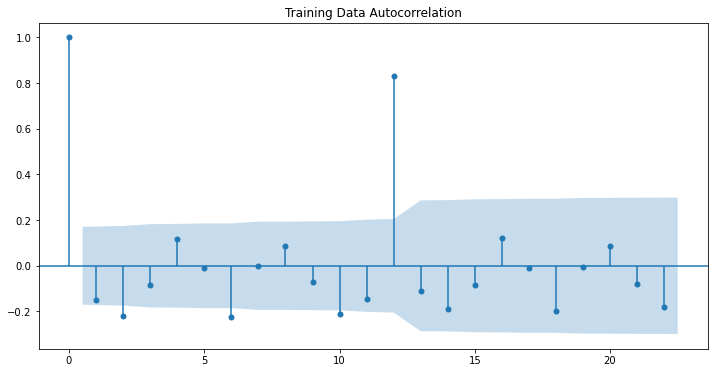

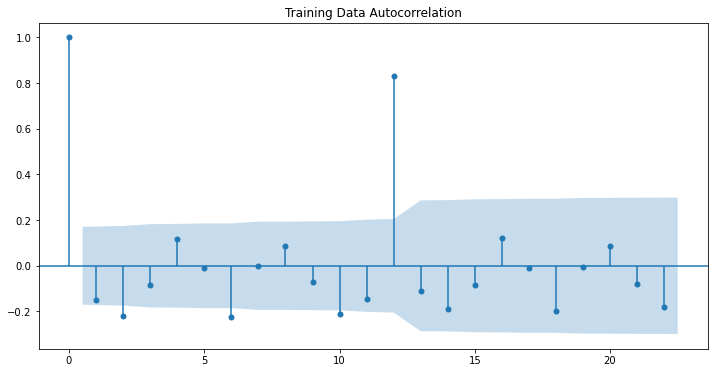

In [91]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')

In [92]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))



Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 4)
Model: (0, 1, 2)(0, 0, 2, 4)
Model: (0, 1, 3)(0, 0, 3, 4)
Model: (1, 1, 0)(1, 0, 0, 4)
Model: (1, 1, 1)(1, 0, 1, 4)
Model: (1, 1, 2)(1, 0, 2, 4)
Model: (1, 1, 3)(1, 0, 3, 4)
Model: (2, 1, 0)(2, 0, 0, 4)
Model: (2, 1, 1)(2, 0, 1, 4)
Model: (2, 1, 2)(2, 0, 2, 4)
Model: (2, 1, 3)(2, 0, 3, 4)
Model: (3, 1, 0)(3, 0, 0, 4)
Model: (3, 1, 1)(3, 0, 1, 4)
Model: (3, 1, 2)(3, 0, 2, 4)
Model: (3, 1, 3)(3, 0, 3, 4)


In [93]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [94]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 4) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 4) - AIC:2185.7939935631935
SARIMA(0, 1, 0)x(0, 0, 2, 4) - AIC:2088.4276347341397
SARIMA(0, 1, 0)x(0, 0, 3, 4) - AIC:1959.5422324270658
SARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:2202.19571994411
SARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:2154.189654301149
SARIMA(0, 1, 0)x(1, 0, 2, 4) - AIC:2027.8958795938818
SARIMA(0, 1, 0)x(1, 0, 3, 4) - AIC:1958.522476498128
SARIMA(0, 1, 0)x(2, 0, 0, 4) - AIC:2137.78745529835
SARIMA(0, 1, 0)x(2, 0, 1, 4) - AIC:2094.3859546833537
SARIMA(0, 1, 0)x(2, 0, 2, 4) - AIC:2025.6386636175057
SARIMA(0, 1, 0)x(2, 0, 3, 4) - AIC:1929.1159284119258
SARIMA(0, 1, 0)x(3, 0, 0, 4) - AIC:1840.8333361960124
SARIMA(0, 1, 0)x(3, 0, 1, 4) - AIC:1842.765568178221
SARIMA(0, 1, 0)x(3, 0, 2, 4) - AIC:1840.8469056203755
SARIMA(0, 1, 0)x(3, 0, 3, 4) - AIC:1803.3374776636128
SARIMA(0, 1, 1)x(0, 0, 0, 4) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 4) - AIC:2166.483551978707
SARIMA(0, 1, 1)x(0, 0, 2, 4) - AIC:2

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 4) - AIC:1873.9202742039972
SARIMA(1, 1, 3)x(2, 0, 0, 4) - AIC:2092.100298817669
SARIMA(1, 1, 3)x(2, 0, 1, 4) - AIC:2041.9654798214845
SARIMA(1, 1, 3)x(2, 0, 2, 4) - AIC:1952.5017312799346
SARIMA(1, 1, 3)x(2, 0, 3, 4) - AIC:1811.4333049885615
SARIMA(1, 1, 3)x(3, 0, 0, 4) - AIC:1775.1970459291967
SARIMA(1, 1, 3)x(3, 0, 1, 4) - AIC:1777.197030873732
SARIMA(1, 1, 3)x(3, 0, 2, 4) - AIC:1779.2225065117816
SARIMA(1, 1, 3)x(3, 0, 3, 4) - AIC:1711.5424612092174
SARIMA(2, 1, 0)x(0, 0, 0, 4) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 4) - AIC:2180.4160271706874
SARIMA(2, 1, 0)x(0, 0, 2, 4) - AIC:2074.5298708970213
SARIMA(2, 1, 0)x(0, 0, 3, 4) - AIC:1949.7038558911083
SARIMA(2, 1, 0)x(1, 0, 0, 4) - AIC:2164.0441349967437
SARIMA(2, 1, 0)x(1, 0, 1, 4) - AIC:2138.1352319652374
SARIMA(2, 1, 0)x(1, 0, 2, 4) - AIC:2020.5578786974693
SARIMA(2, 1, 0)x(1, 0, 3, 4) - AIC:1951.5192898156042
SARIMA(2, 1, 0)x(2, 0, 0, 4) - AIC:2099.0845565892314
SARIMA(2, 1, 0)x(2, 0, 1, 4) - 

In [95]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
63,"(0, 1, 3)","(3, 0, 3, 4)",1710.552837
191,"(2, 1, 3)","(3, 0, 3, 4)",1711.032899
127,"(1, 1, 3)","(3, 0, 3, 4)",1711.542461
255,"(3, 1, 3)","(3, 0, 3, 4)",1714.640013
251,"(3, 1, 3)","(2, 0, 3, 4)",1714.874677


In [96]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(3, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(3, 0, 3, 4)   Log Likelihood                -843.516
Date:                           Sun, 20 Jun 2021   AIC                           1711.033
Time:                                   19:03:06   BIC                           1743.972
Sample:                               01-01-1980   HQIC                          1724.403
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5316      0.043     35.260      0.000       1.446       1.617
ar.L2         -0.9458      0.051    -18.720

In [97]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [98]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1489.775620,347.338138,809.005379,2170.545861
1991-02-01,1348.987035,349.397804,664.179923,2033.794147
1991-03-01,1848.172847,349.772280,1162.631775,2533.713919
1991-04-01,1667.876173,350.195212,981.506170,2354.246176
1991-05-01,1353.543177,351.063678,665.471013,2041.615342


In [99]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)

print('RMSE:',rmse)

RMSE: 713.9776935967018


In [100]:
temp_resultsDf_SARIMA_AIC = pd.DataFrame({'RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_SARIMA_AIC])

resultsDf

,RMSE
"ARIMA(2,1,1)",1374.546024
"SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)",713.977694


### Q7: Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


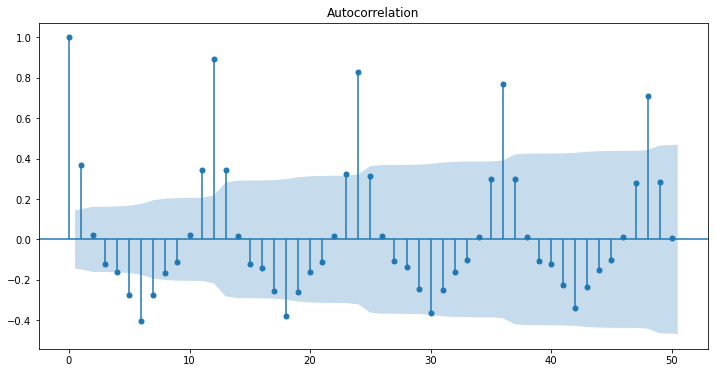

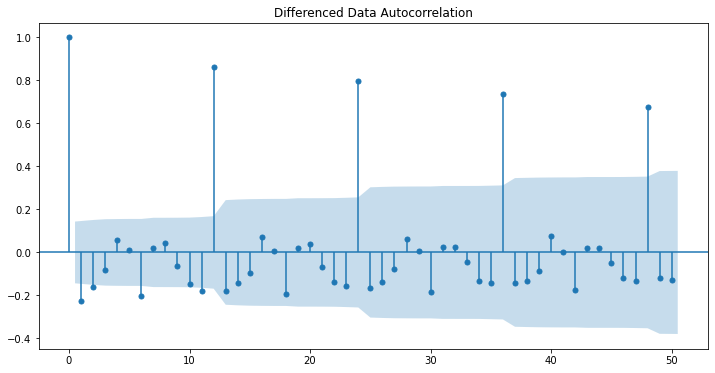

In [102]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

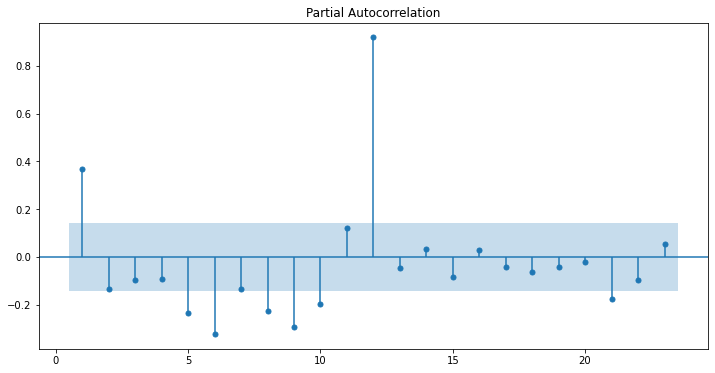

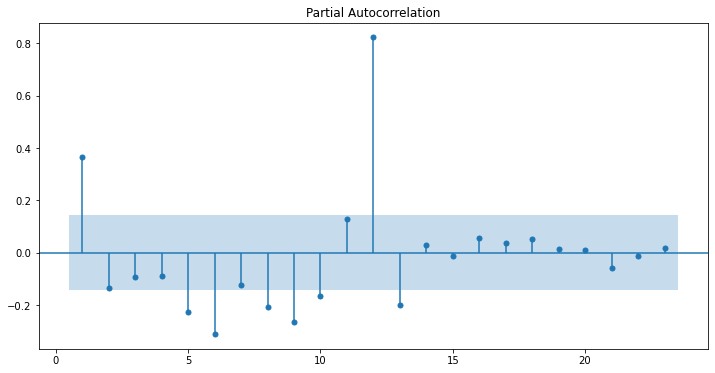

In [103]:
plot_pacf(df,zero=False,alpha=0.05);
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

**ACF AND PACF on training data only**

In [104]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]
print("Shape of Training Data is", train.shape)
print("Shape of Test Data is", test.shape)

Shape of Training Data is (132, 1)
Shape of Test Data is (55, 1)


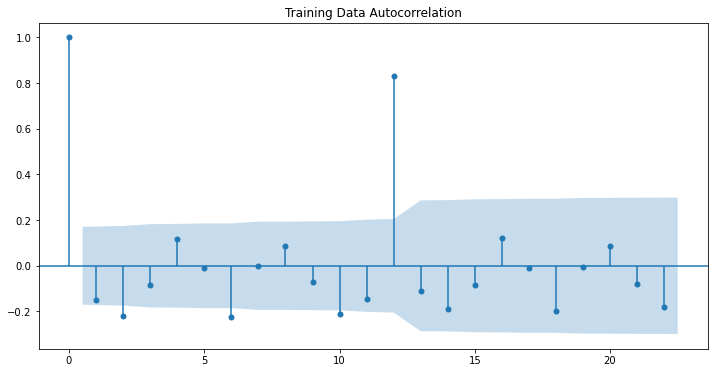

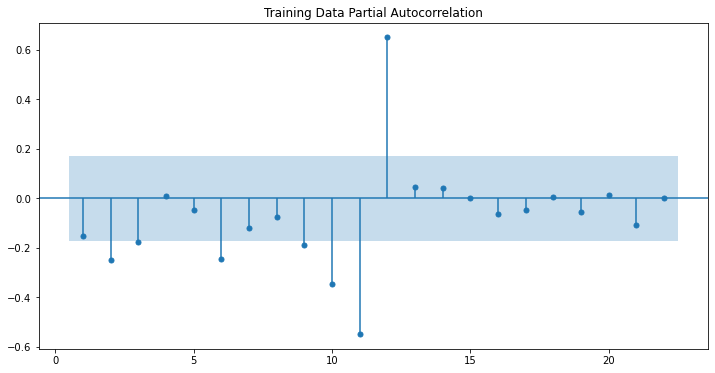

In [105]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

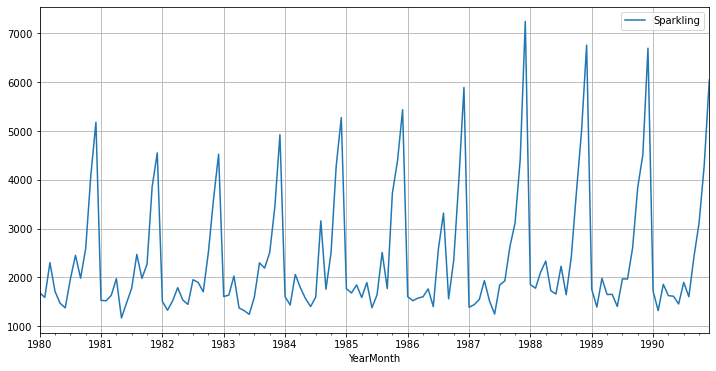

In [106]:
train.plot(grid=True); #visualizing the training data

In [107]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


In [108]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514366e-11
Number of lags used 11


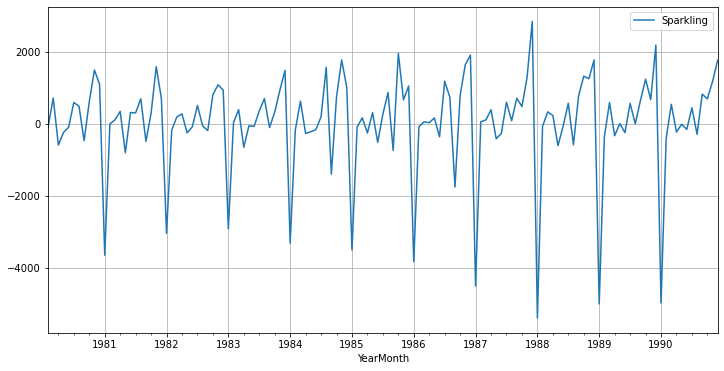

In [109]:
train.diff().dropna().plot(grid=True);

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


**For SARIMA model**

In [111]:
#for Sarima model

p = q = range(0,1)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are


In [112]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [113]:
import statsmodels.api as sm

In [114]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966


In [115]:
SARIMA_AIC.sort_values(by=['AIC']).head()


,param,seasonal,AIC
0,"(0, 1, 0)","(0, 0, 0, 12)",2251.35972


In [116]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -865.045
Date:                            Sun, 20 Jun 2021   AIC                           1738.090
Time:                                    19:03:08   BIC                           1749.139
Sample:                                01-01-1980   HQIC                          1742.576
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1498      0.071    -16.097      0.000      -1.290      -1.010
ar.S.L12       1.0408      0.011   

In [117]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [118]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1417.964748,386.121138,661.181224,2174.748272
1991-02-01,1145.080417,389.378651,381.912284,1908.248549
1991-03-01,1615.907957,392.614481,846.397714,2385.418199
1991-04-01,1493.135022,395.824092,717.334057,2268.935987
1991-05-01,1346.984336,399.007903,564.943216,2129.025457


In [119]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 603.6494071113511


In [120]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,}
                           ,index=['SARIMA(0, 1, 1)(1, 0, 1, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",1374.546024
"SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)",713.977694
"SARIMA(0, 1, 1)(1, 0, 1, 12)",603.649407


### Q8: Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [124]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,1)(0,0,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",1374.546024
"SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)",713.977694
"SARIMA(0, 1, 1)(1, 0, 1, 12)",603.649407
"SARIMA(0,1,1)(0,0,3,12)",1099.387954


## Q9: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [125]:
#Fititng this "SARIMA(0, 1, 1)(1, 0, 1, 12)"" model to intire data 

full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,1,),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91951\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1266.941
Date:                            Sun, 20 Jun 2021   AIC                           2541.882
Time:                                    19:03:09   BIC                           2554.472
Sample:                                01-01-1980   HQIC                          2546.990
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0788      0.038    -28.471      0.000      -1.153      -1.005
ar.S.L12       1.0121      0.011   

In [126]:
#Forecasting for upcoming one year

predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)


In [127]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1877.254167,376.878119,1138.586628,2615.921706
1995-09-01,2418.741793,377.882708,1678.105296,3159.378291
1995-10-01,3296.070789,378.884633,2553.470554,4038.671023
1995-11-01,3998.078150,379.883915,3253.519358,4742.636942
1995-12-01,6250.663528,380.880577,5504.151315,6997.175742


In [128]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 532.1702158997205


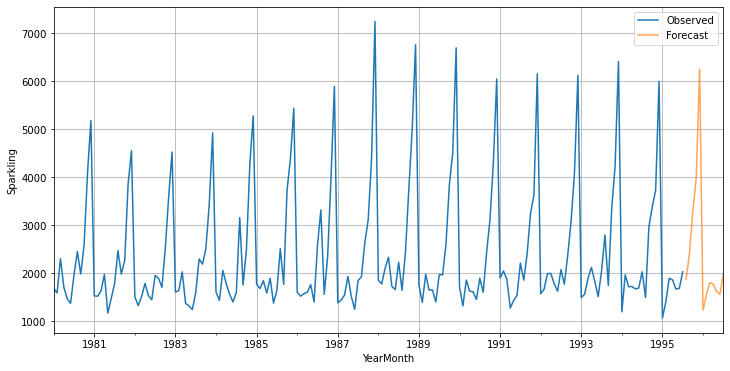

In [129]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();


### Q10: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

**Please refer to the business report for a detailed answer**

This Sparkling data contains the 15 years of data of sales. Once I dug the data it seems to have a strong seasonality in the last year every year. It shows in festive times the demand for wine increases all around. This increasing demand is specific and needs specific care to match the increased demand.

Once predicting the future demand for the next 12 months, it is observed that demand will follow the same trend and will show a strong seasonality at the end of the year. Once the sales data is decomposed it shows the trend of demand as static over the years. The demand has shown a slight increase and a specific increase between Y1987 and Y1990

Various exponential smoothing models development of this project contains the deep analysis of data:

- First data is converted into Time series index, and then EDA has provided the complete insight of data along with Decomposition of data on both additive and multiplicative basis. Additive analysis shows some trends in error terms so multiplicative decomposition is required here.
- Then different techniques of various exponential smoothing models are done training data and its effect is observed on the test data. The RMSE value of the different models is observed, and each model's RMSE value is enclosed here for better understanding. Double Exponential Smoothing follows the test data most accurately comparing the other models.
- Stationarity shows the statistical properties of a time series that do not change over a period of time. Here data was not stationary and the first order of differentiation was required to make it stationary. The augmented Dickey-Fuller test at alpha level =0.05 is used to develop the above model.
- ARIMA and SARIMA models are then developed to generate the future prediction for the next 12 months. ARIMA and SARIMA both are developed using AIC first then using ACF and PACF. 
- The Overall RMSE of the model when implemented on whole data (Training+Test) = RMSE of the Full Model is 532.170401378045
